In [1]:
# Import main SDK
from client import MantisClient, SpacePrivacy, DataType, ReducerModels
from render_args import RenderArgs

import nest_asyncio
import asyncio
import pandas as pd
nest_asyncio.apply()

In [2]:
import json

def pretty_print (obj):
    print(json.dumps(obj, indent=2))

**Get Spaces**

In [3]:
# Load Mantis Client
mantis = MantisClient("/api/proxy/", render_args=RenderArgs(viewport={"width": 1920, "height": 1080}))

In [ ]:
pretty_print(mantis.get_spaces()["public"][:5])

**Create Space**

In [ ]:
# Load Mantis
mantis = MantisClient("/api/proxy/")

# Set data path + types
data_path = "./StockData.csv"

data_types = {"Symbol": DataType.Title,
              "Market Cap": DataType.Numeric,
              "Description": DataType.Semantic}

# Create space
new_space_id = mantis.create_space("Stock data,", 
                                   data=data_path, 
                                   data_types=data_types,
                                   reducer=ReducerModels.UMAP,
                                   privacy_level=SpacePrivacy.PRIVATE)["space_id"]

new_space_id

In [ ]:
# Alternative you can create dataframes
mantis = MantisClient("/api/proxy/")

# Create DF
df = pd.DataFrame({
    "Symbol": ["AAPL", "GOOGL", "MSFT", "AMZN", "FB"],
    "Market Cap": [2000, 1500, 1300, 1200, 800],
    "Description": ["Apple Inc.", "Alphabet Inc.", "Microsoft Corporation", "Amazon.com Inc.", "Facebook Inc."]
})

# Set types
data_types = {"Symbol": DataType.Title,
              "Market Cap": DataType.Numeric,
              "Description": DataType.Semantic}

# Make space
new_space_id = mantis.create_space("Stock data", 
                                   data=df, 
                                   data_types=data_types,
                                   reducer=ReducerModels.UMAP,
                                   privacy_level=SpacePrivacy.Private)

new_space_id

**Load Space**

In [12]:
stock_data_space = await mantis.open_space (new_space_id)

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def imshow(plot):
    # Convert bytes to image
    image = Image.open(io.BytesIO(plot))
    plt.imshow(image)
    plt.axis('off')  # Remove axes and tickers
    plt.show()

In [ ]:
# Show a shot of the page
imshow (await stock_data_space.capture ())

In [15]:
await stock_data_space.close_panel ("reader")
await stock_data_space.close_panel ("categories")
await stock_data_space.close_panel ("analysis")
await stock_data_space.close_panel ("orchestrator")
await stock_data_space.close_panel ("bags")
await stock_data_space.close_panel ("quicksheet")
await stock_data_space.close_panel ("userlogs")

In [ ]:
# Show a shot of the page
imshow (await stock_data_space.capture ())

**Run Code**

In [ ]:
code = """

computation = 6**4
print ('Hello from SDK, :P -> ' + str(computation))

"""


await stock_data_space.run_code (code)

In [ ]:
imshow (await stock_data_space.capture ())

**Data Analysis**

In [19]:
# Select 100 points
await stock_data_space.select_points (100)

In [ ]:
# Plot embed dimensions
plot = await stock_data_space.render_plot ("embed_x", "embed_y")

imshow (plot)

In [ ]:
# Plot Market Cap
plot = await stock_data_space.render_plot ("Market Cap", "embed_y")

imshow (plot)

In [22]:
await stock_data_space.close()

Full Agent Run (not headless)

In [ ]:
import nest_asyncio
nest_asyncio.apply()

async def open_lex_space():
    mantis = MantisClient("/api/proxy/", RenderArgs (headless=False))
    
    LEX_SPACE_ID = mantis.get_space_ids_by_name("Lex Clips",
                                               privacy_levels=[SpacePrivacy.PUBLIC])[0]
    
    # Open the space
    lex_space = await mantis.open_space(LEX_SPACE_ID)
    
    await asyncio.sleep(5) # Let load further
    
    # Close panels
    await lex_space.close_panel("reader")
    await lex_space.close_panel("categories")
    await lex_space.close_panel("analysis")
    await lex_space.close_panel("interpreter")
    await lex_space.close_panel("orchestrator")
    await lex_space.close_panel("bags")
    await lex_space.close_panel("quicksheet")
    await lex_space.close_panel("userlogs")
    
    # Select points and plot
    await lex_space.select_points(100)
    
    await asyncio.sleep(5) # Show the selected point
    
    plot = await lex_space.render_plot("likes", "views")
    
    imshow (plot)
    
    await lex_space.close ()

# Run with:
lex_space = await open_lex_space()

**Mass Production**

In [4]:
mantis = MantisClient("/api/proxy/")

Space: Historical Figures


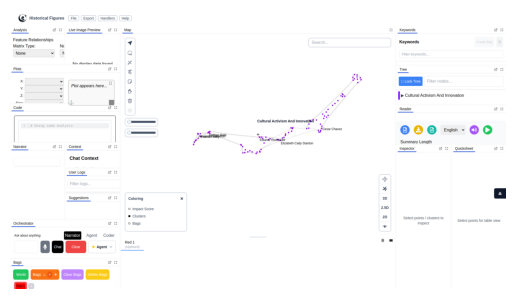

Space: Historical Events


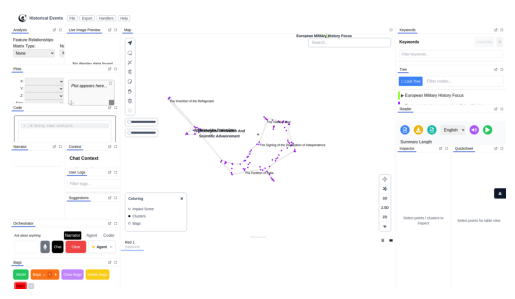

Space: Science


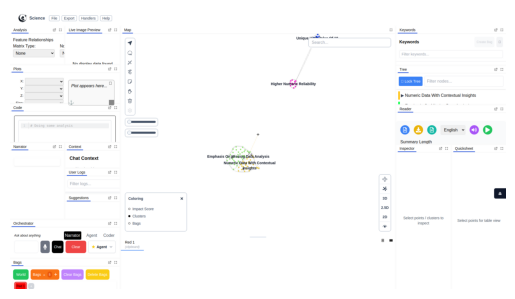

In [5]:
dtypes = {"Name": DataType.Title, "Description": DataType.Semantic, "Impact Score": DataType.Numeric}

SAMPLES = [
    # Data 1
    ("Historical Figures", 
     "./test_docs/figures.csv", 
     dtypes),
    
    # Data 2
    ("Historical Events", 
     "./test_docs/historical.csv", 
     dtypes),
    
    # Data 3
    ("Science", 
     "./test_docs/science.csv", 
     dtypes),
]

# Foreach sample
for space_name, data_path, data_types in SAMPLES:
    # Create & load space
    space_id = mantis.create_space (space_name,
                                    data=data_path,
                                    data_types=data_types)["space_id"]
    
    space = await mantis.open_space (space_id)
    
    await asyncio.sleep (10) # Let load further
    
    # Do some misc analysis
    await space.run_code ("# Doing some analysis")
    
    # Take a screenshot of the space
    print ("Space:", space_name)
    imshow (await space.capture ())